# Experiment 5.1

## Objective:
To forecast future values of a univariate time series using LSTM-based models.

## Suggested Datasets:
- Daily Minimum Temperatures – Melbourne  
- COVID-19 Daily Cases – Our World in Data  
- Airline Passengers Dataset  
- Electricity Consumption Dataset  
- Stock Prices Dataset (e.g., Tesla)  
- Weather Data – Seattle or London  
- Sunspot Activity Dataset  
- Energy Usage – PJM Hourly Energy Consumption  
- Bitcoin Price Time Series  
- Retail Sales Forecasting – Walmart Dataset  

## Expected Outcome:
- Prediction vs Actual Plot  
- RMSE / MAE Values


# Stock Prices Dataset (e.g., Tesla)  

# Import all the required libraries

In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [ ]:
import yfinance as yf
from datetime import date

# Define date range
START = "2010-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Function to load stock data
def load_data(ticker):
    data = yf.download(ticker, start=START, end=TODAY, auto_adjust=False)
    data.reset_index(inplace=True)
    return data

In [ ]:
data = load_data('TCS.NS')
df=data
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,282.703156,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05,282.778381,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06,276.384491,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07,268.693024,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08,263.201752,349.899994,359.250000,348.250000,358.000000,6048178


In [ ]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

<ipython-input-4-8097d146b7ad>:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date', 'Adj Close'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178




```
# This is formatted as code
```

Visualizing Closing Price

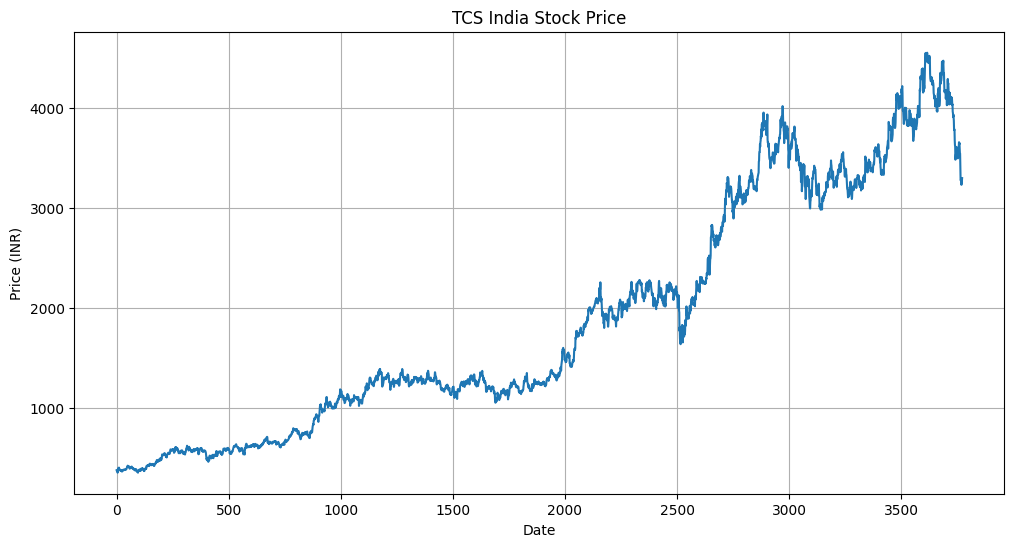

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("TCS India Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (INR)")
plt.grid(True)
plt.show()

In [ ]:
df

Price,Close,High,Low,Open,Volume
Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,375.825012,379.450012,374.524994,377.399994,1963682
1,375.924988,379.774994,373.274994,377.500000,2014488
2,367.424988,376.100006,366.500000,375.924988,3349176
3,357.200012,369.700012,355.500000,367.750000,6474892
4,349.899994,359.250000,348.250000,358.000000,6048178
...,...,...,...,...,...
3768,3246.600098,3270.000000,3212.050049,3260.550049,2990265
3769,3231.500000,3298.949951,3206.000000,3289.550049,7108961
3770,3248.199951,3314.399902,3238.600098,3314.399902,3512160


# Plotting moving averages of 100 day

---



In [ ]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,3967.638989
3769,3958.494990
3770,3950.781990
3771,3943.124490


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

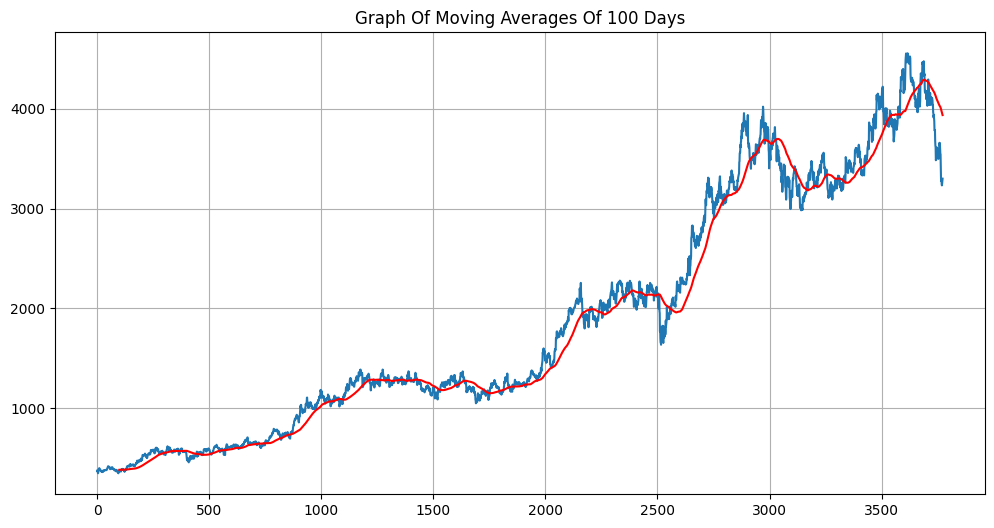

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [ ]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,TCS.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
3768,4100.358741
3769,4097.432241
3770,4094.480991
3771,4091.570741


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

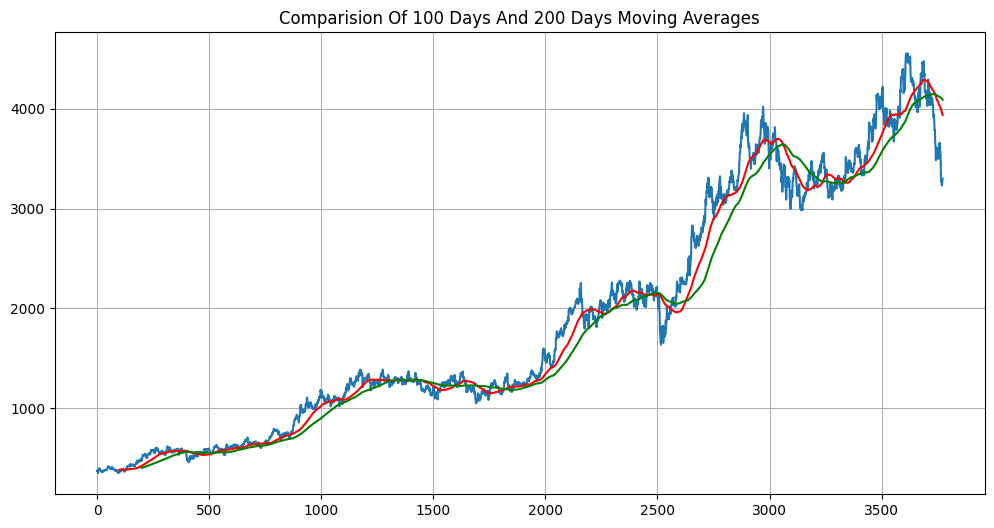

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [ ]:
df.shape

(3773, 5)

In [ ]:
print(data['Date'].min(), data['Date'].max()) # Use the original DataFrame 'data' instead of 'df'
print("Total rows:", df.shape[0])

2010-01-04 00:00:00 2025-04-17 00:00:00
Total rows: 3773


# Spliting the dataset into training (70%) and testing (30%) set

In [ ]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2641, 7)
(1132, 7)


In [ ]:
train.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
0,2010-01-04,282.703156,375.825012,379.450012,374.524994,377.399994,1963682
1,2010-01-05,282.778381,375.924988,379.774994,373.274994,377.500000,2014488
2,2010-01-06,276.384491,367.424988,376.100006,366.500000,375.924988,3349176
3,2010-01-07,268.693024,357.200012,369.700012,355.500000,367.750000,6474892
4,2010-01-08,263.201752,349.899994,359.250000,348.250000,358.000000,6048178


In [ ]:
test.head()

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
2641,2020-09-18,2235.483887,2449.899902,2500.399902,2436.399902,2485.0,4183256
2642,2020-09-21,2249.535645,2465.300049,2504.899902,2452.149902,2465.0,4598809
2643,2020-09-22,2302.141113,2522.949951,2555.000000,2458.000000,2485.0,7499613
2644,2020-09-23,2251.498047,2467.449951,2519.850098,2409.000000,2510.0,7502280
2645,2020-09-24,2128.130859,2332.250000,2450.000000,2302.600098,2450.0,8424708


# Using MinMax scaler for normalization of the dataset

---



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01494372],
       [0.01435815],
       [0.01118437],
       ...,
       [0.99405064],
       [1.        ],
       [0.98749226]])

In [ ]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train.shape

(2541, 100, 1)

# ML Model (LSTM)

---



In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [ ]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 106ms/step - loss: 0.0843 - mean_absolute_error: 0.2108
Epoch 2/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0080 - mean_absolute_error: 0.0630
Epoch 3/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0075 - mean_absolute_error: 0.0619
Epoch 4/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0071 - mean_absolute_error: 0.0594
Epoch 5/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0062 - mean_absolute_error: 0.0565
Epoch 6/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0060 - mean_absolute_error: 0.0544
Epoch 7/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0060 - mean_absolute_error: 0.0517
Epoch 8/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0058 - mean_absolute_error: 0.0517
Epoch 9/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0047 - mean_absolute_error: 0.0479
Epoch 10/100
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0041 - mean_absolute_error: 0.0443
Epoch 11/100
80/80 ━━━━━━━━

In [ ]:
model.save('keras_model.keras')

In [ ]:
test_close.shape

(1132, 1)

In [ ]:
past_100_days = pd.DataFrame(train_close[-100:])

In [ ]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [ ]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [ ]:
final_df.head()

,0
0,1850.050049
1,1942.199951
2,1913.650024
3,1927.000000
4,1893.599976


In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.        ],
       [0.03461744],
       [0.02389225],
       ...,
       [0.52162891],
       [0.51802249],
       [0.51389018]])

In [ ]:
input_data.shape

(1232, 1)

# Testing the model

---



In [ ]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [ ]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1132, 100, 1)
(1132,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [ ]:
# Making predictions

y_pred = model.predict(x_test)

36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step


In [ ]:
y_pred.shape

(1132, 1)

In [ ]:
y_test

array([0.2202708 , 0.22618752, 0.22838519, ..., 0.52162891, 0.51802249,
       0.51389018])

In [ ]:
y_pred

array([[0.17487662],
       [0.1779499 ],
       [0.18127237],
       ...,
       [0.54467964],
       [0.5261538 ],
       [0.51074857]], dtype=float32)

In [ ]:
scaler.scale_

array([0.00037566])

In [ ]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

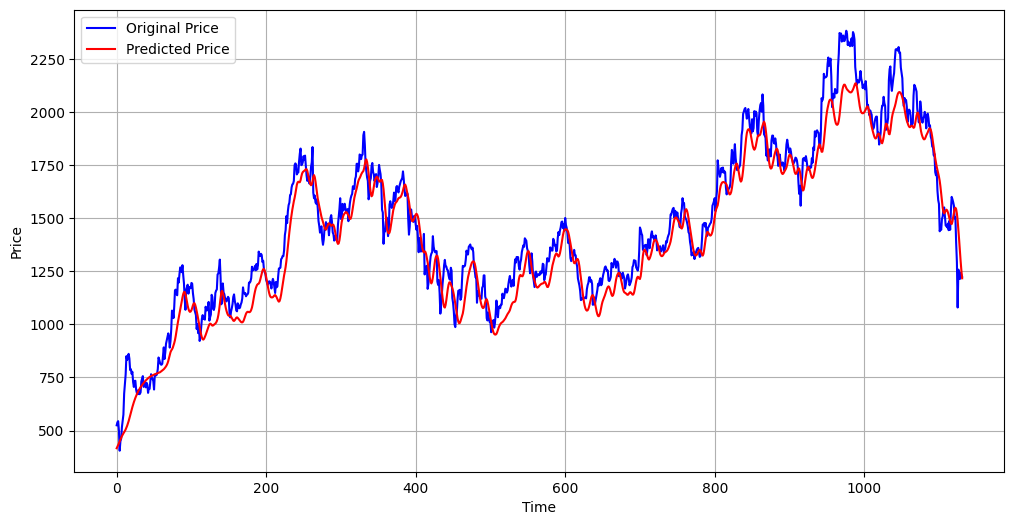

In [ ]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100

print("Mean absolute error (MAE): {:.2f}".format(mae))
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error (MAE): 84.30
Mean absolute error on test set: 5.75%


Calculating Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_percentage = (rmse / np.mean(y_test)) * 100

print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("RMSE as percentage of mean actual: {:.2f}%".format(rmse_percentage))

Root Mean Squared Error (RMSE): 106.50
RMSE as percentage of mean actual: 7.27%


Calculation of R2 score

In [ ]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.9222423196407289


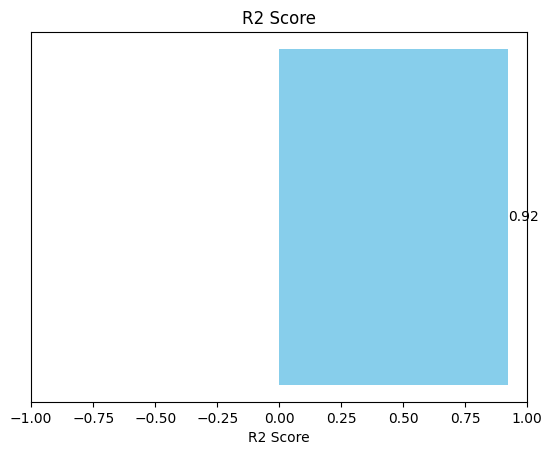

In [ ]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

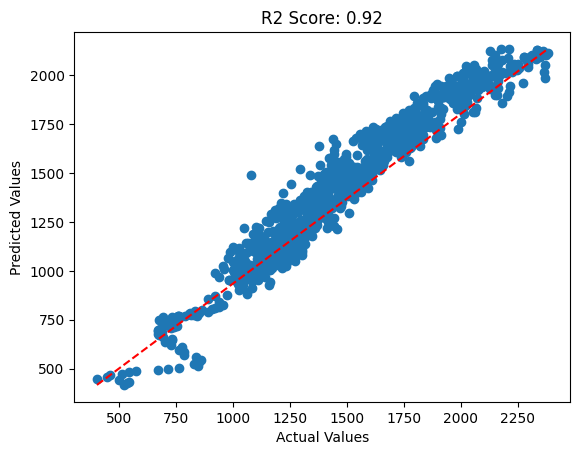

In [ ]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()